# **Quora Insincere Questions Classification**

<font size = "4">**Importing Necessary Libraries**</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')
sub_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/sample_submission.csv')

In [9]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [10]:
train_df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [11]:
train_df.shape

(1306122, 3)

In [12]:
train_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


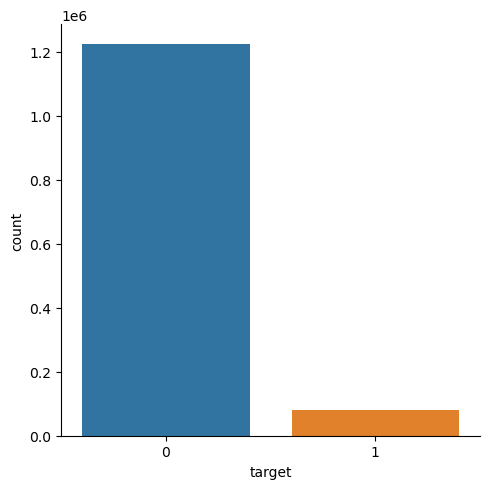

In [13]:
sns.catplot(x='target', kind='count', data=train_df)

<font size='5'>The above catplot shows that there is a significant class imbalance present in the dataset. It is dealt in the further stage.<font/>

## **Data Preparation**

<font size = '3'>Before proceeding, first task is to preprocess the text data. For this purpose we use the nltk library.<font/>

In [14]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font size='4'> Using the stopwords module, all english stopwords in the library are generated. <font/>

In [15]:
eng_stopwords = stopwords.words('english')
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<font size='4'> To stem the words to their stem/root word, the Snowball Stemmer is used to remove suffixes from the word. <font/>

In [17]:
stemmer = SnowballStemmer('english')

In [18]:
def stem_tokenizer(sentence):
    tokens = word_tokenize(sentence)
    final_tokens = []
    for token in tokens:
        final_tokens.append(stemmer.stem(token))
    return final_tokens

print(stem_tokenizer('My name is Kamlesh. I am working for the data analysis industry'))

['my', 'name', 'is', 'kamlesh', '.', 'i', 'am', 'work', 'for', 'the', 'data', 'analysi', 'industri']


<font size='4'> To tokenize the documents and learn the vocabulary from the doc itself, we use the Tfidf Vectorizer. <font/>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(tokenizer = stem_tokenizer, stop_words = eng_stopwords, max_features=2000)

In [20]:
sample_df = train_df.sample(200000)
sample_df

,qid,question_text,target
1135902,dea1868b6e6b9d9365c2,Can I use 2sc2688 as an inverter?,0
1164370,e427dc190901c0ec6a01,I am accepted by both Baruch college and Fordh...,0
415884,51801f1df25ceffc82a0,Who are the most unfortunate football players ...,0
923760,b509593bb96fbe8a406c,How can we fall in love with someone when we a...,0
1191661,e98b31a2d24db53054cd,Is there such a thing as the right way when wa...,0
...,...,...,...
752875,938161631d3f476053f0,Is it possible to use Bluetooth of a earphone ...,0
172041,21a3beed66e3e1cb6127,What is Power Factor tariff?,0
1007976,c584cfdf99468b7a8e8c,Why are men who are to be electrocuted in the ...,0
374507,496a69fcfa34307cbdb2,When Sandeep sir going to take a session in Ra...,0


In [21]:
vectorizer.fit(sample_df['question_text'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function stem_tokenizer at 0x78a3ef2c7b50>)

In [22]:
vectorizer.get_feature_names_out()[:100] #viewing 100 features from the vocabulary

array(['!', '$', '%', '&', "'", "''", "'d", "'m", "'s", '(', ')', '+',
       ',', '-', '.', '/', '/math', '0', '1', '10', '100', '10th', '11',
       '11th', '12', '12th', '13', '14', '15', '16', '17', '18', '1st',
       '2', '20', '2016', '2017', '2018', '2019', '25', '2nd', '3', '30',
       '3d', '4', '40', '5', '50', '6', '60', '7', '8', '9', ':', ';',
       '=', '?', '[', ']', '``', 'abil', 'abl', 'abort', 'abov', 'abroad',
       'absolut', 'abus', 'ac', 'academ', 'academi', 'acceler', 'accept',
       'access', 'accomplish', 'accord', 'account', 'accur', 'achiev',
       'acid', 'across', 'act', 'action', 'activ', 'actor', 'actress',
       'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'address',
       'administr', 'admiss', 'admit', 'adopt', 'adult', 'advanc',
       'advantag', 'advertis'], dtype=object)

In [23]:
inputs = vectorizer.transform(sample_df['question_text'])
inputs.shape

(200000, 2000)

In [46]:
test_inputs = vectorizer.transform(test_df['question_text'])

In [24]:
targets = sample_df['target']
targets

1135902    0
1164370    0
415884     0
923760     0
1191661    0
          ..
752875     0
172041     0
1007976    0
374507     0
647557     0
Name: target, Length: 200000, dtype: int64

In [42]:
x_train, x_val, y_train, y_val = train_test_split(inputs, targets, train_size=0.75, random_state = 42)
x_train

<150000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 946556 stored elements in Compressed Sparse Row format>

In [43]:
y_train

531197     0
126460     0
255962     0
1278650    0
549524     0
          ..
578104     0
747059     1
999173     1
455060     0
50002      0
Name: target, Length: 150000, dtype: int64

## Model Training in PyTorch

In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [27]:
device

'cuda'

<font size = '4'>

* Torch requires tensor input.
* x_train and x_val are scipy.sparse._csr.csr_matrix. So they are first converted into np arrays and then into tensors.
* y_train and y_val are pandas.core.series.Series. So, values are taken and then converted into tensors.

<font/>

In [47]:
train_input_tensor = torch.tensor(x_train.toarray()).float().to(device)
validation_input_tensor = torch.tensor(x_val.toarray()).float().to(device)

train_target_tensor = torch.tensor(y_train.values).float().to(device)
validation_target_tensor = torch.tensor(y_val.values).float().to(device)

test_tensor = torch.tensor(test_inputs.toarray()).float().to(device)

In [51]:
print(train_target_tensor)

tensor([0., 0., 0.,  ..., 1., 0., 0.], device='cuda:0')


In [55]:
train_tensor_dataset = TensorDataset(train_input_tensor, train_target_tensor)
validation_tensor_dataset = TensorDataset(validation_input_tensor, validation_target_tensor)
test_tensor_dataset = TensorDataset(test_tensor)

In [56]:
train_tensor_dataset[0:5]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([0., 0., 0., 0., 0.], device='cuda:0'))

In [60]:
l_rate = 0.001

In [61]:
train_loader = DataLoader(train_tensor_dataset, batch_size=128)
val_loader = DataLoader(validation_tensor_dataset, batch_size=128)
test_loader = DataLoader(test_tensor_dataset, batch_size=128)

In [65]:
for i, j in train_loader:
    print(i.shape)
    print(j.shape)
    break

torch.Size([128, 2000])
torch.Size([128])


In [80]:
import torch.nn as nn
import torch.nn.functional as F

In [115]:
class QuoraModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2000, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 64)
        self.layer4 = nn.Linear(64, 1)
    
    def forward(self, inputs):
        out = self.layer1(inputs)
        out = F.relu(out)       # introducing non linearity
        
        out = self.layer2(out)
        out = F.relu(out)
        
        out = self.layer3(out)
        out = F.relu(out)
        
        out = self.layer4(out)

        
        return out
    
model = QuoraModel()
model.to(device)       

QuoraModel(
  (layer1): Linear(in_features=2000, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=1, bias=True)
)

In [116]:
import torchinfo
torchinfo.summary(model = QuoraModel())

Layer (type:depth-idx)                   Param #
QuoraModel                               --
├─Linear: 1-1                            1,024,512
├─Linear: 1-2                            131,328
├─Linear: 1-3                            16,448
├─Linear: 1-4                            65
Total params: 1,172,353
Trainable params: 1,172,353
Non-trainable params: 0

In [117]:
from sklearn.metrics import f1_score, accuracy_score

# Training and Evaluation

<font size='4'>To deal with class imbalances, we use the f1_score metric from the sci-kit learn library.<font/>

In [120]:
def evaluator(model, dataLoader):
    f1_s, accs, losses = [], [], []
    
    for batch in dataLoader:
        batch_in, batch_targets = batch
        batch_out = model(batch_in)
        
        probablities = torch.sigmoid(batch_out[:,0])

    predicted = (probablities>0.5).int()
    
    batch_targets = batch_targets.cpu()
    predicted = predicted.cpu()
    probablities = probablities.cpu()

    f1 = f1_score(batch_targets, predicted)
    loss = F.binary_cross_entropy(probablities, batch_targets)
    acc = accuracy_score(batch_targets, predicted)

    f1_s.append(f1)
    losses.append(loss)
    accs.append(acc)
    
    dict = {'f1_s':torch.mean(torch.tensor(f1_s)).item(), 'accs':torch.mean(torch.tensor(accs)).item(), 'losses':torch.mean(torch.tensor(losses)).item()}
    return dict['f1_s'], dict['accs'], dict['losses']

In [121]:
evaluator(model, train_loader)

(0.0, 0.9375, 0.6573975682258606)

In [123]:
history = []
def model_fit(epochs, model, train_dataLoader,validation_dataLoader):
    optimizer = torch.optim.Adam(model.parameters(), lr = l_rate)
    for epoch in range(epochs):
        for batch in train_dataLoader:
            batch_in, batch_targets = batch
            
            # calculate predicted outputs
            batch_out = model(batch_in)
            probablities = torch.sigmoid(batch_out[:,0])        # batch_out is represented like this [0]. To remove the brackets, [:,0] is used.
            predicted = (probablities>0.5).int()
            
            # calculate loss
            loss = F.binary_cross_entropy(probablities, batch_targets)
            
            # back propagration
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        
        # evaluation part 
        f1, acc, loss = evaluator(model, validation_dataLoader)
        print(f"Epoch {epoch+1} | Loss {loss:.4f} | Accuracy {acc:.4f} | F-1 Score {f1:.4f}")
        history.append([acc, f1, loss])
    return history

In [124]:
model_fit(20, model, train_loader, val_loader)

Epoch 1 | Loss 0.0488 | Accuracy 0.9875 | F-1 Score 0.8000
Epoch 2 | Loss 0.0444 | Accuracy 1.0000 | F-1 Score 1.0000
Epoch 3 | Loss 0.0829 | Accuracy 0.9625 | F-1 Score 0.5714
Epoch 4 | Loss 0.1034 | Accuracy 0.9750 | F-1 Score 0.7500
Epoch 5 | Loss 0.1337 | Accuracy 0.9750 | F-1 Score 0.6667
Epoch 6 | Loss 0.1208 | Accuracy 0.9750 | F-1 Score 0.7500
Epoch 7 | Loss 0.2531 | Accuracy 0.9625 | F-1 Score 0.5714
Epoch 8 | Loss 0.2272 | Accuracy 0.9500 | F-1 Score 0.5000
Epoch 9 | Loss 0.2379 | Accuracy 0.9625 | F-1 Score 0.6667
Epoch 10 | Loss 0.2715 | Accuracy 0.9625 | F-1 Score 0.5714
Epoch 11 | Loss 0.2878 | Accuracy 0.9625 | F-1 Score 0.6667
Epoch 12 | Loss 0.4188 | Accuracy 0.9625 | F-1 Score 0.6667
Epoch 13 | Loss 1.4160 | Accuracy 0.9625 | F-1 Score 0.6667
Epoch 14 | Loss 1.3514 | Accuracy 0.9750 | F-1 Score 0.7500
Epoch 15 | Loss 0.2061 | Accuracy 0.9625 | F-1 Score 0.5714
Epoch 16 | Loss 1.4101 | Accuracy 0.9500 | F-1 Score 0.5000
Epoch 17 | Loss 1.4147 | Accuracy 0.9625 | F-1 Sc

[[0.9875, 0.8, 0.0488140806555748],
 [1.0, 1.0, 0.04440109431743622],
 [0.9625, 0.5714285714285715, 0.08290902525186539],
 [0.975, 0.7499999999999999, 0.10340174287557602],
 [0.975, 0.6666666666666666, 0.13367880880832672],
 [0.975, 0.7499999999999999, 0.12078703939914703],
 [0.9625, 0.5714285714285715, 0.2530747056007385],
 [0.95, 0.5, 0.22718782722949982],
 [0.9625, 0.6666666666666666, 0.2379012554883957],
 [0.9625, 0.5714285714285715, 0.27154630422592163],
 [0.9625, 0.6666666666666666, 0.28784728050231934],
 [0.9625, 0.6666666666666666, 0.4187867045402527],
 [0.9625, 0.6666666666666666, 1.415998935699463],
 [0.975, 0.7499999999999999, 1.3513890504837036],
 [0.9625, 0.5714285714285715, 0.20610320568084717],
 [0.95, 0.5, 1.4100661277770996],
 [0.9625, 0.6666666666666666, 1.4147013425827026],
 [0.975, 0.7499999999999999, 0.24625663459300995],
 [0.95, 0.5, 1.421640157699585],
 [0.95, 0.3333333333333333, 1.3080888986587524]]

Text(0.5, 1.0, 'losses vs no.of epochs')

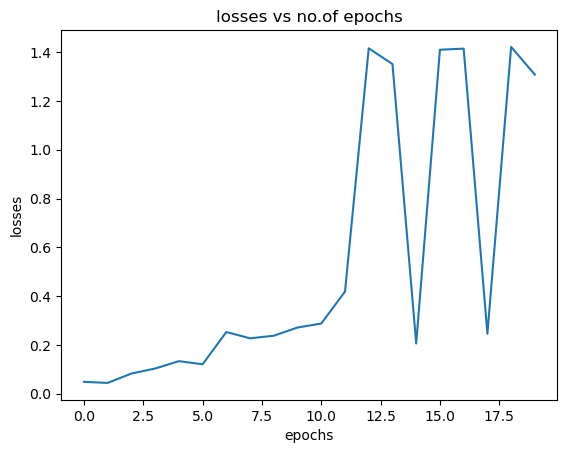

In [131]:
losses = [item[2] for item in history]
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('losses vs no.of epochs')

Text(0.5, 1.0, 'accuracy vs no.of epochs')

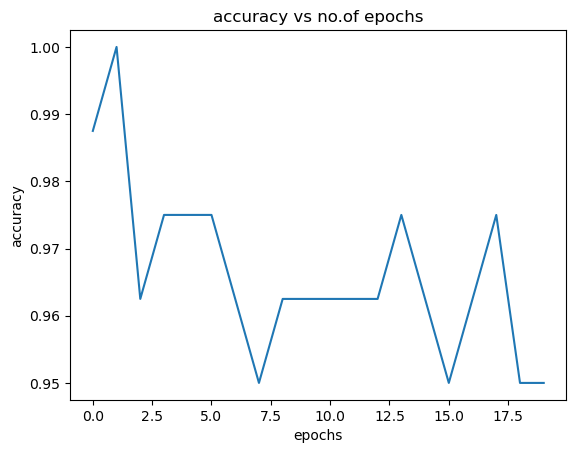

In [132]:
#plotting accuracies
accs = [item[0] for item in history]
plt.plot(accs)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy vs no.of epochs')

Text(0.5, 1.0, 'f1_score vs no.of epochs')

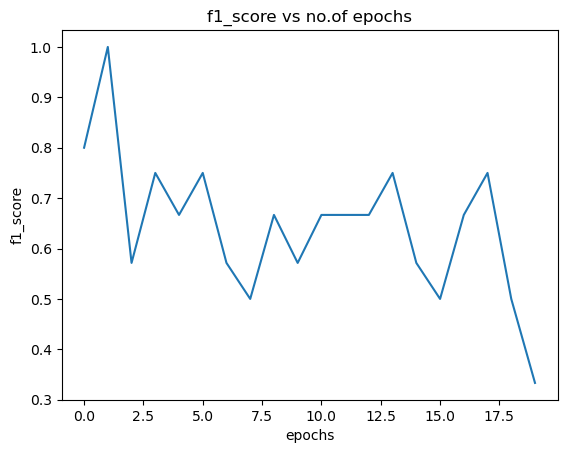

In [134]:
f1_score = [item[1] for item in history]
plt.plot(f1_score)
plt.xlabel('epochs')
plt.ylabel('f1_score')
plt.title('f1_score vs no.of epochs') 